In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#!pip install tensorflow==2.0.0

# **Import MNIST Dataset**

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.
/home/aldisio/Documents/IFCE/Treineer/LAPISCO/Aulas/Deeplearning/aldisio-materiais-aula-deeplearning/notebooks-deeplearning/.env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/aldisio/Documents/IFCE/Treineer/LAPISCO/Aulas/Deeplearning/aldisio-materiais-aula-deeplearning/notebooks-deeplearning/.env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/aldisio/Documents/IFCE/Treineer/LAPISCO/Aulas/Deeplearning/aldisio-materiais-aula-deeplearning/notebooks-deeplearning/.env/lib/python3.6/site-pac

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data(path='/tmp/mnist.npz')

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

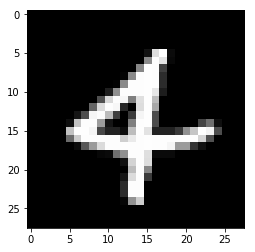

In [7]:
plt.imshow(X_train[150], cmap='gray')
plt.show()

# **Flattening image (Vetorizing)**

In [8]:
#AM: Vetorizing
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [9]:
#AM: Normalization
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [10]:
#AM: Transformated samples in one pixels vector (28x28=784) each.
X_train.shape

(60000, 784)

## **One hot encoding**

In [11]:
#AM: Adjust label to One-Hot encoding
from keras.utils.np_utils import to_categorical

#AM: Transform values 1 to 000000001, 2 to 000000010, 3 to 000000100, etc
y_train_categ = to_categorical(y_train) 
y_test_categ = to_categorical(y_test)

In [12]:
y_train[100]

5

In [13]:
y_train_categ[100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# **Fully Connected Model**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend
backend.clear_session()

#AM: Building the structure
model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

#AM: Compiling model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
h = model.fit(X_train, y_train_categ, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 64us/sample - loss: 0.3272 - accuracy: 0.8987 - val_loss: 0.2956 - val_accuracy: 0.9131
Epoch 2/10
42000/42000 [==============================] - 1s 23us/sample - loss: 0.1124 - accuracy: 0.9652 - val_loss: 0.1856 - val_accuracy: 0.9446
Epoch 3/10
42000/42000 [==============================] - 1s 23us/sample - loss: 0.0719 - accuracy: 0.9776 - val_loss: 0.1832 - val_accuracy: 0.9465
Epoch 4/10
42000/42000 [==============================] - 1s 23us/sample - loss: 0.0519 - accuracy: 0.9840 - val_loss: 0.1221 - val_accuracy: 0.9671
Epoch 5/10
42000/42000 [==============================] - 1s 23us/sample - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.1291 - val_accuracy: 0.9697
Epoch 6/10
42000/42000 [==============================] - 1s 23us/sample - loss: 0.0295 - accuracy: 0.9912 - val_loss: 0.1401 - val_accuracy: 0.9676
Epoch 7/10
42000/42000 [==============================] 

In [16]:
results = model.evaluate(X_test, y_test_categ)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.1123 - accuracy: 0.9778


In [17]:
results

[0.11229954807253717, 0.9778]

Text(0.5, 0, 'Epochs')

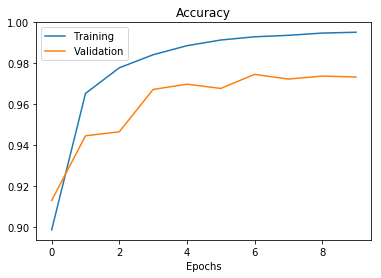

In [18]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')